# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [3]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [4]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [6]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

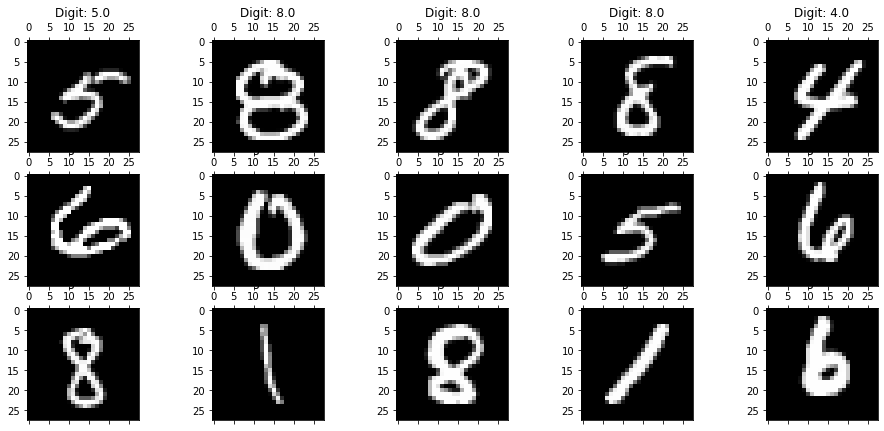

In [7]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=2020)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56000, 785), (14000, 785), (56000, 1), (14000, 1))

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler().fit(X_train)
X_train_pca = PCA(n_components=0.99).fit(X_train)

In [12]:
X_train_pca.explained_variance_ratio_.cumsum()

array([0.09756466, 0.16922741, 0.23084393, 0.28472941, 0.33364853,
       0.3765519 , 0.4093167 , 0.43823729, 0.46576503, 0.48921013,
       0.51029983, 0.5306187 , 0.54771516, 0.56458582, 0.58045637,
       0.59529438, 0.60846393, 0.62126172, 0.63319357, 0.64471685,
       0.65538065, 0.66550587, 0.67510537, 0.68419604, 0.69303551,
       0.70139568, 0.709505  , 0.71734292, 0.72479923, 0.73167172,
       0.7382042 , 0.74465704, 0.75068426, 0.7565623 , 0.76221963,
       0.76764688, 0.7726906 , 0.77755366, 0.78235986, 0.78704779,
       0.7916101 , 0.79607018, 0.80024845, 0.80422586, 0.80805341,
       0.81180364, 0.81542724, 0.81890979, 0.82229076, 0.825492  ,
       0.82866396, 0.83176225, 0.83472106, 0.83760538, 0.84041776,
       0.84311796, 0.84579555, 0.8483593 , 0.85087383, 0.85332162,
       0.85571448, 0.85810282, 0.86039822, 0.86261121, 0.86474054,
       0.86680056, 0.86882583, 0.8707691 , 0.87269734, 0.87458714,
       0.87646189, 0.87827398, 0.88003848, 0.88177615, 0.88342

In [13]:
17*5+2

87

In [14]:
X_train_pca.n_components_

331

87개로 90% 복원가능

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
train_lda = lda.fit_transform(X_train, np.ravel(y_train))

In [16]:
lda.explained_variance_ratio_

array([0.23749294, 0.20344906, 0.17845661, 0.10645763, 0.09400401,
       0.06876516, 0.05029031, 0.03430822, 0.02677606])

In [17]:
lda.explained_variance_ratio_.cumsum()

array([0.23749294, 0.44094199, 0.61939861, 0.72585624, 0.81986025,
       0.8886254 , 0.93891571, 0.97322394, 1.        ])

7개로 90% 복원가능

In [18]:
pca = PCA(n_components=87)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [19]:
lda = LinearDiscriminantAnalysis(n_components=7)
X_train_lda = lda.fit_transform(X_train, np.ravel(y_train))
X_test_lda = lda.transform(X_test)

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from time import time

pca

In [21]:
rf = RandomForestClassifier(random_state=2020)
start = time()
rf.fit(X_train_pca, y_train)

print('걸린 시간 : ', time() - start)

C:\Users\hites\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


걸린 시간 :  68.27179503440857


In [23]:
rf_pred = rf.predict(X_test_pca)
print(f1_score(rf_pred, y_test, average='macro'))

0.9517404357430497


lda

In [24]:
rf = RandomForestClassifier(random_state=2020)
start = time()
rf.fit(X_train_lda, y_train)

print('걸린 시간 : ', time() - start)

C:\Users\hites\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


걸린 시간 :  17.002073287963867


In [25]:
rf_pred = rf.predict(X_test_lda)
print(f1_score(rf_pred, y_test, average='macro'))

0.8898294488921781


특정한 틀 없이 자유롭게 해주시면 됩니다!